# Exploratory data analysis for $D^0\to \gamma\gamma$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import minimize

from pdflib import normal, double_normal
from llhlib import loglh_maker
from plotlib import poisson_hist, fit_plot, plot_scatter

In [2]:
import glob

In [3]:
matplotlib.rcParams['font.size'] = 14

In [4]:
files = sorted(glob.glob('./csv/*.csv'))
print('\n'.join(files))

./csv/taumuthr.csv
./csv/tup.csv
./csv/tupd0gamgam.csv
./csv/tupdbltau.csv
./csv/tupdpkpipi.csv
./csv/tupfulldkpidgg.csv


In [5]:
df = pd.read_csv(files[2])
df.shape

(41198, 19)

In [6]:
df.head()

,Unnamed: 0,evtn,D0_gamma0_p,D0_gamma_p,D0_gamma0_pt,D0_gamma_pt,D0_gamma0_costh,D0_gamma_costh,D0_gamma0_px_mc,D0_gamma_px_mc,D0_gamma0_py_mc,D0_gamma_py_mc,D0_gamma0_pz_mc,D0_gamma_pz_mc,D0_gamma0_pdgid_mc,D0_gamma_pdgid_mc,M,p,pt
0,0,0,0.830138,1.075409,0.798465,1.044341,-0.273590,0.238630,-0.342736,0.283937,-0.714329,0.992323,-0.225363,0.253628,22.0,22.0,1.883114,0.291535,0.290038
1,2,1,0.861937,0.992600,0.801081,0.983444,0.369083,-0.135515,0.794437,-0.980063,0.227054,-0.127779,0.328121,-0.135184,22.0,22.0,1.831650,0.290460,0.225061
2,4,2,1.003727,0.915522,1.001196,0.888250,-0.070970,0.242258,-0.997886,0.842989,0.024641,0.167522,-0.071021,0.214607,22.0,22.0,1.898655,0.280405,0.236557
3,6,3,1.020853,0.843872,0.776934,0.489938,-0.648678,0.814201,-0.474375,0.316574,0.621314,-0.385700,-0.666272,0.699767,22.0,22.0,1.842211,0.288890,0.287816
4,8,4,1.034493,0.856217,0.956107,0.772510,-0.381842,0.431240,0.890265,-0.772132,-0.329737,0.070674,-0.392228,0.370597,22.0,22.0,1.868006,0.292122,0.290983


In [7]:
df.describe()

,Unnamed: 0,evtn,D0_gamma0_p,D0_gamma_p,D0_gamma0_pt,D0_gamma_pt,D0_gamma0_costh,D0_gamma_costh,D0_gamma0_px_mc,D0_gamma_px_mc,D0_gamma0_py_mc,D0_gamma_py_mc,D0_gamma0_pz_mc,D0_gamma_pz_mc,D0_gamma0_pdgid_mc,D0_gamma_pdgid_mc,M,p,pt
count,41198.000000,41198.000000,41198.000000,41198.000000,41198.000000,41198.000000,41198.000000,41198.000000,41198.000000,41198.000000,41198.000000,41198.000000,41198.000000,41198.000000,41198.0,41198.0,41198.000000,41198.000000,41198.000000
mean,41197.000000,20497.252439,0.942924,0.945591,0.802959,0.805629,-0.001339,0.000587,-0.001179,0.002000,-0.001387,0.001331,-0.001565,0.000196,22.0,22.0,1.865938,0.288736,0.254637
std,23785.965063,11832.535751,0.087052,0.088416,0.160888,0.161653,0.504860,0.504310,0.579385,0.576987,0.577534,0.575412,0.475050,0.473519,0.0,0.0,0.026709,0.037921,0.051066
min,0.000000,0.000000,0.431129,0.465426,0.288022,0.351337,-0.899784,-0.899920,-1.084686,-1.080774,-1.082838,-1.080081,-0.966967,-0.960317,22.0,22.0,1.700599,0.129978,0.010690
25%,20598.500000,10252.250000,0.868792,0.870261,0.699555,0.702146,-0.435434,-0.435758,-0.526337,-0.521231,-0.525085,-0.517015,-0.409298,-0.406407,22.0,22.0,1.849633,0.279485,0.235275
50%,41197.000000,20497.500000,0.941977,0.946017,0.818920,0.820017,-0.003623,0.001345,-0.004290,0.005788,-0.001005,0.001060,-0.003422,0.000356,22.0,22.0,1.865131,0.285985,0.265280
75%,61795.500000,30742.750000,1.017598,1.019855,0.924221,0.927748,0.438043,0.437174,0.524731,0.524128,0.522311,0.518945,0.410020,0.405543,22.0,22.0,1.880803,0.293118,0.281587
max,82394.000000,40996.000000,1.807325,1.956203,1.719123,1.863212,0.899963,0.899925,1.084998,1.082046,1.084986,1.084712,0.947738,0.969542,22.0,22.0,1.999902,1.520712,1.509811


In [8]:
df = df[df.M > 1.75]

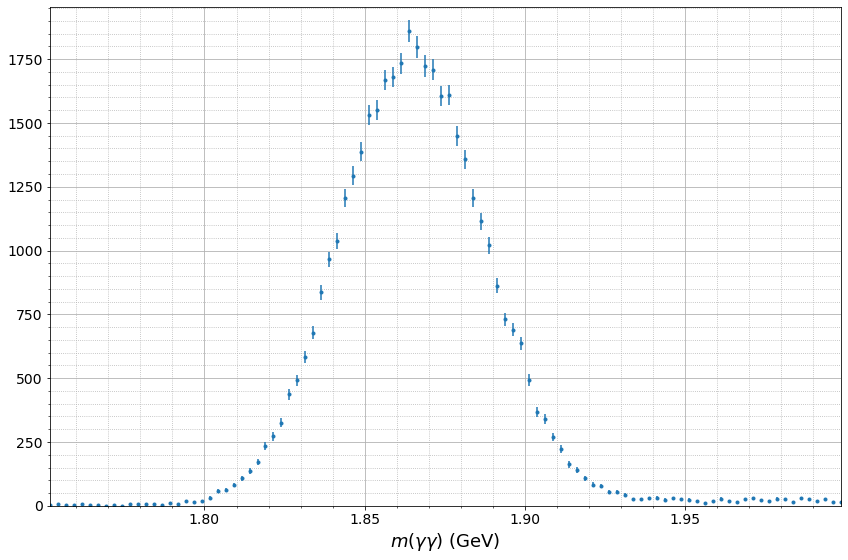

In [9]:
poisson_hist(df.M, xlabel=r'$m(\gamma\gamma)$ (GeV)');

In [10]:
ebeam = 0.5 * 3.77313
df['E'] = np.sqrt(df.M**2 + df.p**2)
df['deltaE'] = df.E - ebeam
df['Mbc'] = np.sqrt(ebeam**2 - df.p**2)

In [11]:
df[['M', 'Mbc']].describe()

,M,Mbc
count,41103.000000,41103.000000
mean,1.866265,1.864163
std,0.025850,0.011104
min,1.750445,1.116495
25%,1.849774,1.863665
50%,1.865193,1.864766
75%,1.880842,1.865752
max,1.999902,1.881388


In [12]:
df = df[(df.deltaE < 0.15) & (df.Mbc > 1.83)]

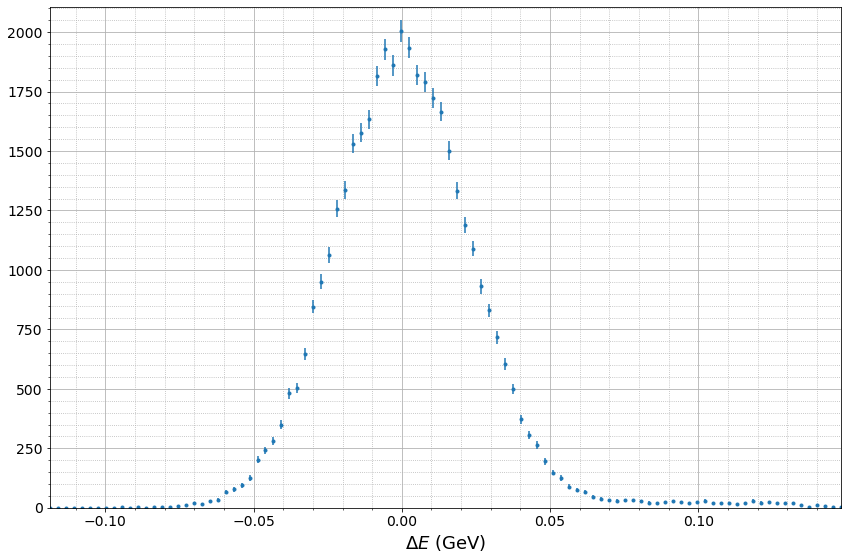

In [13]:
poisson_hist(df.deltaE, xlabel=r'$\Delta E$ (GeV)');

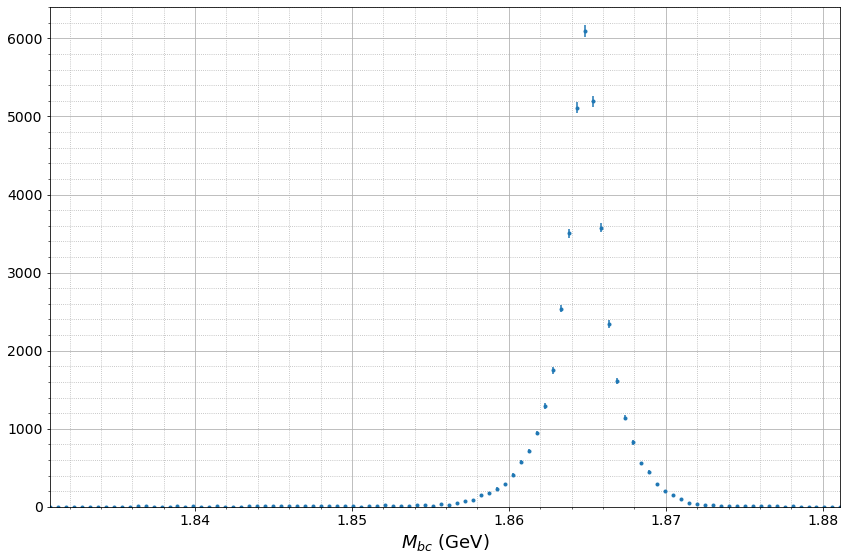

In [14]:
poisson_hist(df.Mbc, xlabel=r'$M_{bc}$ (GeV)');

In [15]:
fcn = loglh_maker(normal, df.M)

In [16]:
bounds = [(1.85, 1.87), (0.01, 0.05)]
fitres = minimize(fcn, [1.865, 0.03], bounds=bounds)
fitres.x

array([1.86631398, 0.02552348])

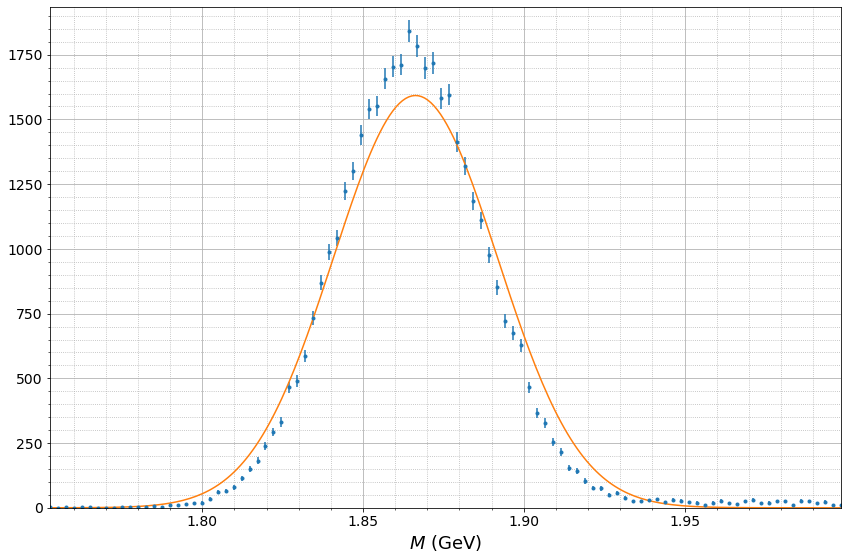

In [17]:
fit_plot(normal, fitres.x, df.M, xlabel=r'$M$ (GeV)');

In [18]:
fcn2 = loglh_maker(double_normal, df.M)

In [19]:
bounds2 = [(1.85, 1.87), (0.01, 0.026), (0.026, 0.10), (0.0, 1.0)]
fitres2 = minimize(fcn2, [1.865, 0.02, 0.3, 0.5], bounds=bounds2)
fitres2.x

array([1.86519528, 0.02178788, 0.06036494, 0.94383724])

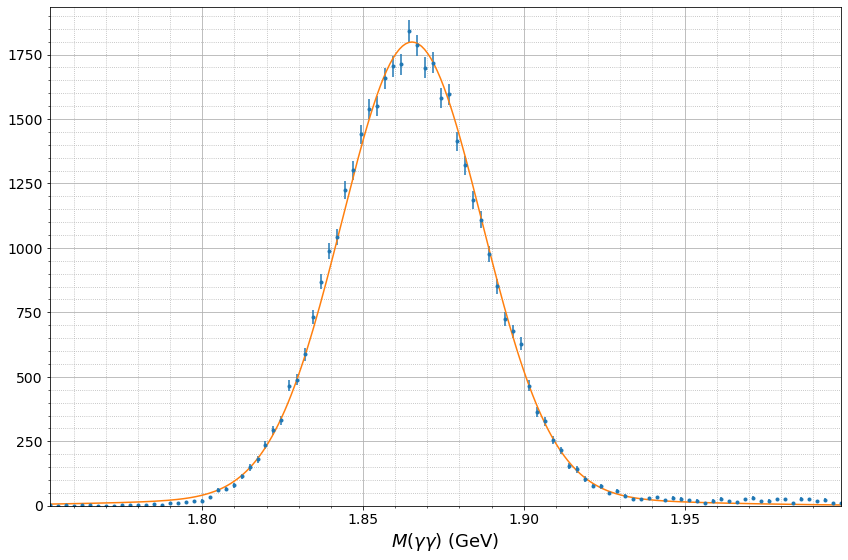

In [20]:
fit_plot(double_normal, fitres2.x, df.M, xlabel=r'$M(\gamma\gamma)$ (GeV)');

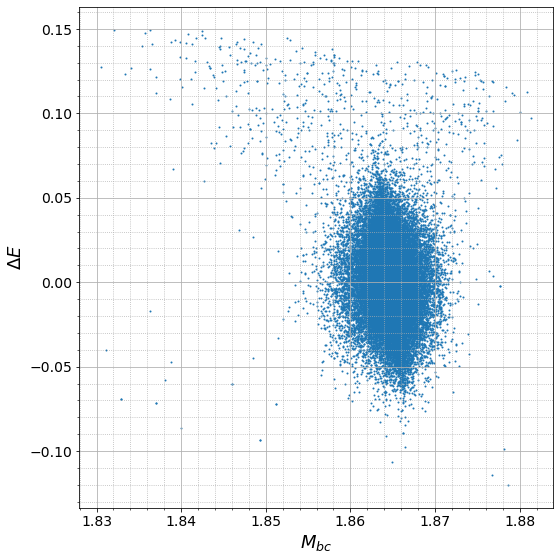

In [21]:
plot_scatter(df.Mbc, df.deltaE, r'$M_{bc}$', r'$\Delta E$');

In [22]:
fcn3 = loglh_maker(double_normal, df.deltaE)

In [23]:
bounds3 = [(-0.02, 0.02), (0.01, 0.026), (0.026, 0.10), (0.0, 1.0)]
fitres3 = minimize(fcn3, [0., 0.02, 0.3, 0.5], bounds=bounds3)
fitres3.x

array([4.73201525e-04, 2.17949221e-02, 6.33804882e-02, 9.47655787e-01])

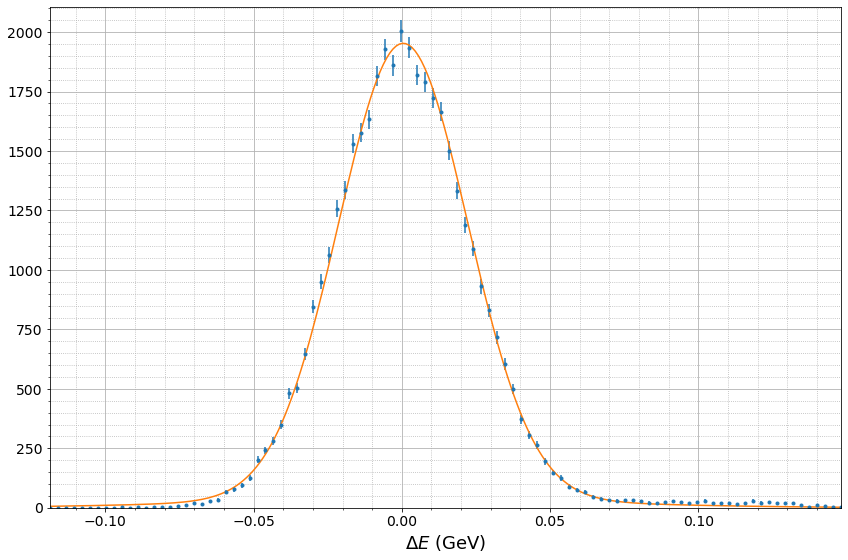

In [24]:
fit_plot(double_normal, fitres3.x, df.deltaE, xlabel=r'$\Delta E$ (GeV)');